In [ ]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv
Saving stores.csv to stores.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
test = pd.read_csv("test.csv")

# Data Cleaning & Preparation

In [ ]:
print(train.head())
print(features.head())
print(stores.head())
print(test.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
train_full = train.merge(features, on=['Store','Date'], how='left')
train_full = train_full.merge(stores, on='Store', how='left')

In [ ]:
test_full = test.merge(features, on=['Store','Date'], how='left')
test_full = test_full.merge(stores, on='Store', how='left')

In [ ]:
import pandas as pd

train_full['is_train'] = 1
test_full['is_train'] = 0

test_full['Weekly_Sales'] = 0

full_df = pd.concat([train_full, test_full], axis=0, ignore_index=True)

In [ ]:
df = full_df.sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday_y Type    Size  is_train  
0         8.106        Fal

In [ ]:
print(df.shape)

(536634, 18)


In [ ]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,271038
MarkDown2,338949
MarkDown3,294308


In [ ]:
df.drop('MarkDown1', axis=1, inplace=True)
df.drop('MarkDown2', axis=1, inplace=True)
df.drop('MarkDown3', axis=1, inplace=True)
df.drop('MarkDown4', axis=1, inplace=True)
df.drop('MarkDown5', axis=1, inplace=True)

In [ ]:
df['CPI'].fillna(df['CPI'].mode()[0], inplace=True)
df['Unemployment'].fillna(df['Unemployment'].mode()[0], inplace=True)

/tmp/ipython-input-4045433517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CPI'].fillna(df['CPI'].mode()[0], inplace=True)
/tmp/ipython-input-4045433517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
print(df.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday_x               bool
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
IsHoliday_y               bool
Type                    object
Size                     int64
is_train                 int64
dtype: object


In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] =df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsMonthStart'] = df['Date'].dt.is_month_start.astype(int)
df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)

In [ ]:
df = df.drop('Date', axis=1)

In [ ]:
print(df['Type'].unique())

['A' 'B' 'C']


In [ ]:
df['Type'] = df['Type'].map({'A': 0, 'B': 1, 'C': 2})

In [ ]:
bool_cols = ['IsHoliday_x', 'IsHoliday_y']
for col in bool_cols:
    df[col] = df[col].astype(int)

In [ ]:
print(df.dtypes)

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday_x       int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
IsHoliday_y       int64
Type              int64
Size              int64
is_train          int64
Year              int32
Month             int32
WeekOfYear       UInt32
DayOfWeek         int32
IsMonthStart      int64
IsMonthEnd        int64
dtype: object


In [ ]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns
df[numeric_cols] = df[numeric_cols].astype(int)

In [ ]:
ext_cols = []

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()

outlier_counts = outliers.sum()

for col, count in outlier_counts.items():
    if count > 0:
        ext_cols.append(col)

print("Columns with outliers:", ext_cols)

Columns with outliers: ['Weekly_Sales', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'Unemployment', 'IsHoliday_y', 'is_train', 'IsMonthStart', 'IsMonthEnd']


In [ ]:
import numpy as np

for col in ext_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  df[col] = np.where(df[col] < lower, lower,
                               np.where(df[col] > upper, upper, df[col]))

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers.sum()

,0
Store,0
Dept,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
IsHoliday_y,0
Type,0


# Exploratory Data Analysis

In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,is_train,Year,Month,WeekOfYear,DayOfWeek,IsMonthStart,IsMonthEnd
count,536634.000000,536634.000000,536634.000000,536634.0,536634.000000,536634.0,536634.000000,536634.000000,536634.0,536634.000000,536634.000000,536634.0,536634.000000,536634.000000,536634.0,536634.0,536634.0,536634.0
mean,22.208621,44.277301,10038.909786,0.0,58.280826,3.0,168.779364,7.264310,0.0,0.590516,136678.550960,1.0,2011.354241,6.295203,25.231581,4.0,0.0,0.0
std,12.790580,30.527358,12715.629611,0.0,18.668895,0.0,39.440529,1.562601,0.0,0.666882,61007.711799,0.0,1.040218,3.333808,14.554119,0.0,0.0,0.0
min,1.000000,1.000000,-4988.000000,0.0,3.000000,3.0,126.000000,3.000000,0.0,0.000000,34875.000000,1.0,2010.000000,1.000000,1.0,4.0,0.0,0.0
25%,11.000000,18.000000,49.000000,0.0,45.000000,3.0,132.000000,6.000000,0.0,0.000000,93638.000000,1.0,2010.000000,3.000000,13.0,4.0,0.0,0.0
50%,22.000000,37.000000,4118.000000,0.0,60.000000,3.0,140.000000,7.000000,0.0,0.000000,140167.000000,1.0,2011.000000,6.000000,24.0,4.0,0.0,0.0
75%,33.000000,74.000000,15497.000000,0.0,73.000000,3.0,212.000000,8.000000,0.0,1.000000,202505.000000,1.0,2012.000000,9.000000,37.0,4.0,0.0,0.0
max,45.000000,99.000000,38669.000000,0.0,101.000000,3.0,228.000000,11.000000,0.0,2.000000,219622.000000,1.0,2013.000000,12.000000,52.0,4.0,0.0,0.0


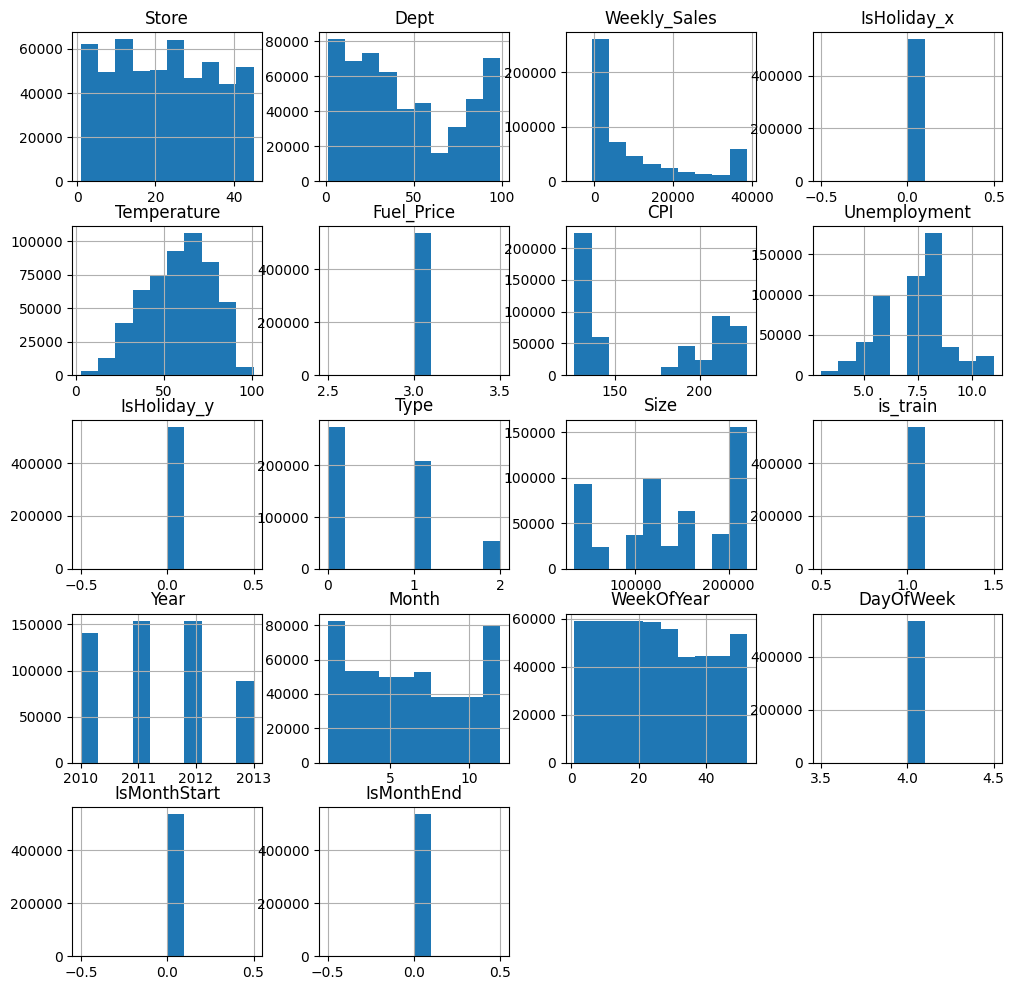

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 12))
plt.show()

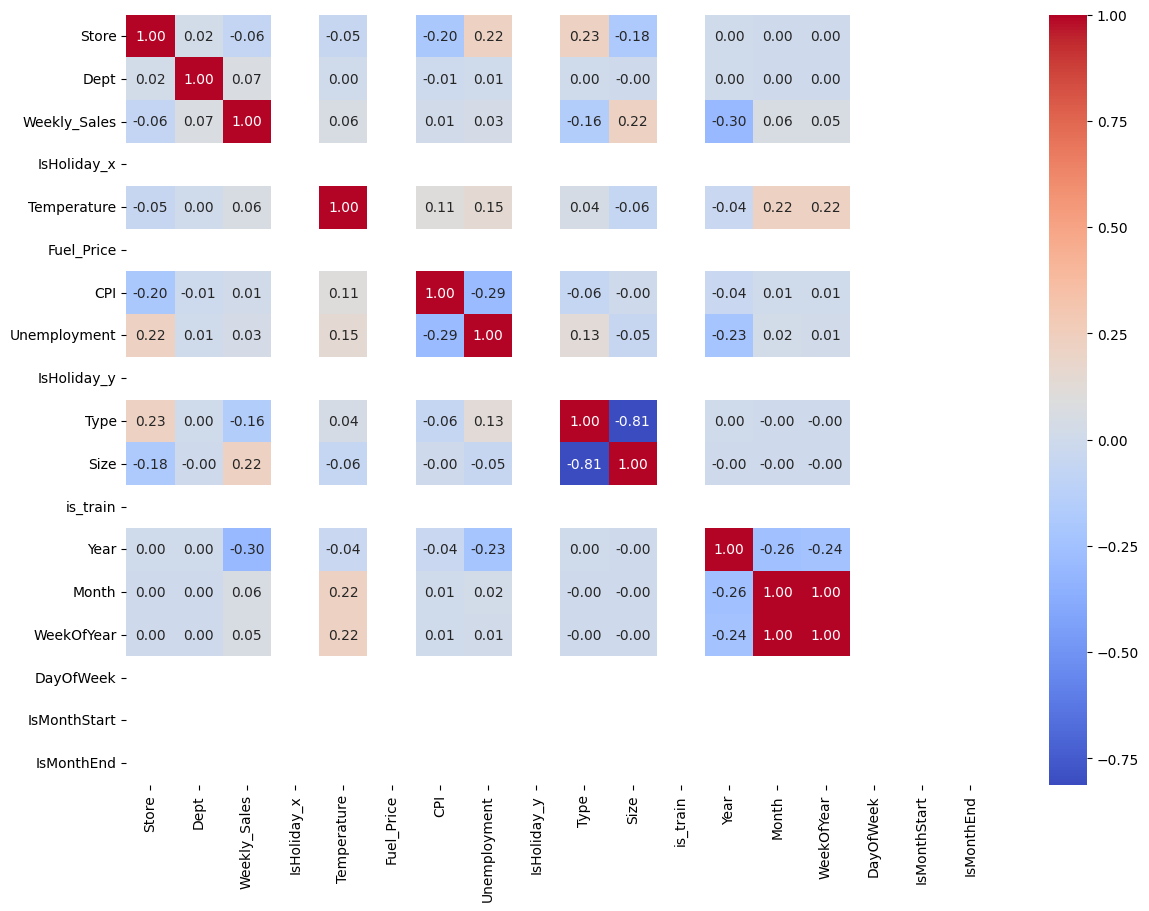

In [ ]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
df['weekly sales to store size'] = df['Weekly_Sales'] / df['Size']

In [ ]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,is_train,Year,Month,WeekOfYear,DayOfWeek,IsMonthStart,IsMonthEnd,weekly sales to store size
0,1,1,24924.0,0.0,42.0,3.0,211,8.0,0.0,0,151315,1.0,2010,2,5,4,0.0,0.0,0.164716
1,1,1,38669.0,0.0,38.0,3.0,211,8.0,0.0,0,151315,1.0,2010,2,6,4,0.0,0.0,0.255553
2,1,1,38669.0,0.0,39.0,3.0,211,8.0,0.0,0,151315,1.0,2010,2,7,4,0.0,0.0,0.255553
3,1,1,19403.0,0.0,46.0,3.0,211,8.0,0.0,0,151315,1.0,2010,2,8,4,0.0,0.0,0.128229
4,1,1,21827.0,0.0,46.0,3.0,211,8.0,0.0,0,151315,1.0,2010,3,9,4,0.0,0.0,0.144249


array([0.16471599, 0.25555299, 0.12822919, ..., 0.00297747, 0.00395023,
       0.0091016 ])

# Model Selection & Training

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Weekly_Sales', 'is_train'])
y = df['Weekly_Sales']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

Train shape: (429307, 17) (429307,)
Test shape: (107327, 17) (107327,)
MAE: 146.1405157136601
RMSE: 388.9489285161879
R²: 0.9989653338395758


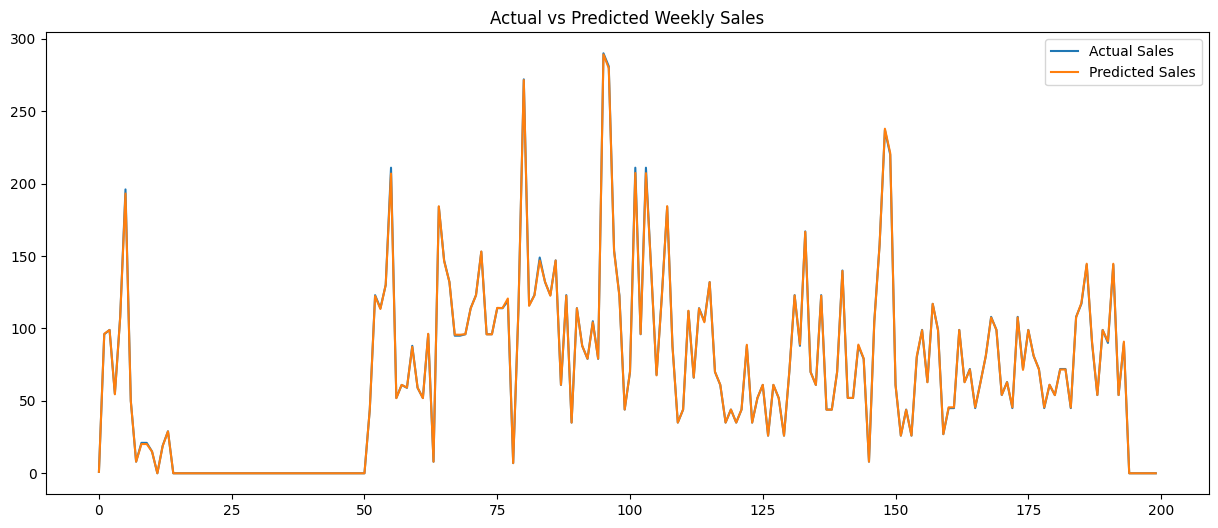

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(y_test.values[:200], label="Actual Sales")
plt.plot(y_pred[:200], label="Predicted Sales")
plt.legend()
plt.title("Actual vs Predicted Weekly Sales")
plt.show()